### 목표 설정
- 선형회귀를 이용해서 주택 가격을 예측해보자
- 특성 곱을 사용해보자
- 규제 모델을 사용해보자

- BX : 왹ㄱ 주택 시장의 동향 및 가격 분석, 스마트홈 시스템 설치 환경 여부와 주택 가격의 상관 관계를 확인해보고 스마트 홈 시스템 비지니스 전략 수립, 스마트 홈 시스템의 대중화 및 초 개인화

- **추후 데이터 추가**

    1. 네트워크 인프라
        - 고속 인터넷 연결 : 주택 내 고속 인터넷 연결 상태.
        - wifi 커버리지 : 주택 전체에 걸친 안정적인 wifi 커버리지
    2. 전기 인프라
        - 전기 배선 : 최신 표준에 따른 전기 배선 상태
        - 스마트 조명: 스마트 조명 시스템 설치 준비 상태,
        - 스마트 보안 시스템 : 스마트 도어락, CCTV등 보안 시스템 설치 준비 상태
    3. 기타 편의 시설
        - 충전소 준비 : 전기차 충전소가 설치 되어있는가?
        - 에너지 관리 시스템 : 에너지의 효율적 주택관리 시스템 준비되어 있는가(태양열)
- CX : 외국 고객이 중요하게 생각하는 주택의 특성(방의 갯수, 차고의 수, 크기, 위치 등)과 개인의 가치관(안전, 에너지 절약, 건강, 디자인, 의사소통 등)을 반영한 스마트홈 시스템 경험

    - **추후 데이터 추가** : 시스템홈 시스템 설치후 고객 만족도 데이터 수지비 및 분석, 고객이 추가로 원하는 주택내의 스마트홈 기기 분석

- DX : 외국 주택 환경에서 고객이 불편함을 느끼는 요소와 한국 스마트 가전기기에 대한 인식 및 만족감

- 트리거 : 외국 주택 환경에서 고객이 불편함을 느끼는 요소와 한국의 스마트 가전기기에 대한 인식 및 만족감

- 엑셀러레이터 : 고객이 중요하게 생각하는 다양한 주택 특성 확인, 개인이 중요시 여기는 주택환경의 가치관을 확인

- 트래커 : 스마트 홈 설치 이후, 고객의 행동 변화를 모니터링해서 분석, 예를 들어 에너지 소비패턴(절약패턴) 스마트 기기 사용빈도, 스마트홈 시스템 설치 전 후의 주택가격 변화 및 고객 만족도 추적

In [1]:
! pip install seaborn

In [2]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# 경고창 무시
import warnings
warnings.filterwarnings('ignore')

In [3]:
house_data = pd.read_csv('./data/melb_data.csv')
house_data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [4]:
# 데이터 정보 확인
house_data.info
# 입력특성 / 정답 특성 확인
# 결측치 확인 -> 기계학습시 결측치가 있으면 학습 XX
# 데이터 타입 확인 -> 범주형, 문자열 형태의 데이터는 학습이 되지 않는다. -> 수치형(인코딩)

<bound method DataFrame.info of               Suburb           Address  Rooms Type      Price Method  \
0         Abbotsford      85 Turner St      2    h  1480000.0      S   
1         Abbotsford   25 Bloomburg St      2    h  1035000.0      S   
2         Abbotsford      5 Charles St      3    h  1465000.0     SP   
3         Abbotsford  40 Federation La      3    h   850000.0     PI   
4         Abbotsford       55a Park St      4    h  1600000.0     VB   
...              ...               ...    ...  ...        ...    ...   
13575  Wheelers Hill      12 Strada Cr      4    h  1245000.0      S   
13576   Williamstown     77 Merrett Dr      3    h  1031000.0     SP   
13577   Williamstown       83 Power St      3    h  1170000.0      S   
13578   Williamstown      96 Verdon St      4    h  2500000.0     PI   
13579     Yarraville        6 Agnes St      4    h  1285000.0     SP   

        SellerG        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  \
0        Biggin   3/12

Suburb: 주택이 위치한 교외 지역의 이름  
Address: 주택의 주소  
Rooms: 주택의 방 개수  
Type: 주택 유형 (h: 주택, u: 유닛, t: 타운하우스)  
Price: 주택 가격  
Method: 판매 방법 (S: 매매, SP: 매매 후 가격 공개, PI: 경매 전에 가격, VB: 경매 후 가격 공개)  
SellerG: 판매 대행 부동산 중개인의 이름  
Date: 판매 날짜  
Distance: 주택이 CBD (중심 업무 지구)에서 떨어진 거리 (킬로미터 단위)  
Postcode: 우편번호  
Bedroom2: 주택의 침실 개수 (2개의 침실을 갖춘 주택)  
Bathroom: 주택의 욕실 개수  
Car: 주차 가능한 자동차 수  
Landsize: 대지 면적 (평방 미터 단위)  
BuildingArea: 건축 면적 (평방 미터 단위)  
YearBuilt: 주택이 건축된 연도  
CouncilArea: 관할 구역  
Lattitude: 주택의 위도  
Longtitude: 주택의 경도  
Regionname: 지역 이름  
Propertycount: 지역 내의 부동산 개수  

In [5]:
# 결측치가 있는 특성들을 뽑아보자
house_data.isnull().sum().sort_values(ascending = False) 

BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Car                62
Suburb              0
Bathroom            0
Regionname          0
Longtitude          0
Lattitude           0
Landsize            0
Bedroom2            0
Address             0
Postcode            0
Distance            0
Date                0
SellerG             0
Method              0
Price               0
Type                0
Rooms               0
Propertycount       0
dtype: int64

### EDA 탐색적 데이터 분석
- 기술 통계량 확인, 시각화

In [6]:
# 기술 통계량 확인
# describe() : 평균, 갯수, 표준편차, 사분위수 통꼐치를 나열해서 보여주는 함수
house_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


<function matplotlib.pyplot.show(close=None, block=None)>

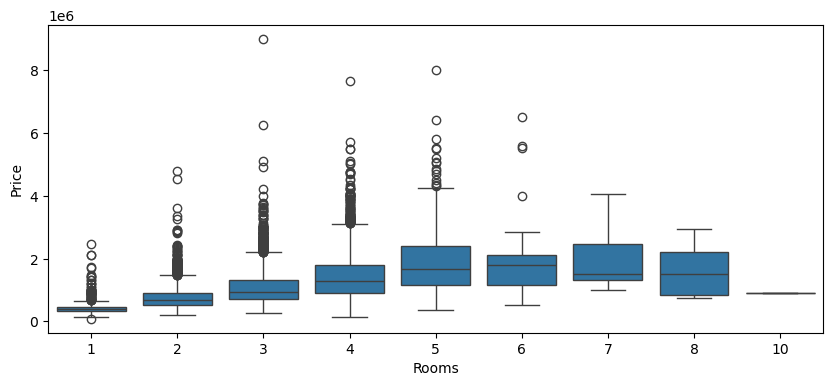

In [7]:
# 방의 갯수에 따른 주택가격 분포 현황을 살펴보자
plt.figure(figsize = (10,4))
sns.boxplot(x = 'Rooms', y = "Price", data = house_data)
plt.show
# 방 갯수가 증가할 수록 주택 가격의 중앙값이 상승하구나
# 방 갯수 6개 이상은 중앙값에 큰 의미가 없어 보인다
# 이상치의 갯수가 많은 것으로 판단된다

In [8]:
# 방이 3개 이상일 때 이상치의 갯수를 확인
# house_data에서 방의 갯수가 3개인 데이터만 추출
# 불리언 인덱싱
house_data[house_data['Rooms'] ==3].describe()

# 사분위수를 이용해서 이상치를 탐지하는 방법
# IQR : 사분위수 범위 (3사분위 - 1사분위)
# 75% data = 1320000
# 25% data = 725000
# max data = 9000000

# 사분위수를 이용한 이상치 탐지 기법
# 3사분위 + 1.5 * IQR
# 1320000 + 1.5 * (1320000-725000)

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,5881.0,5.881000e+03,5881.000000,5881.000000,5881.000000,5881.000000,5852.000000,5881.000000,2967.000000,3336.000000,5881.000000,5881.000000,5881.000000
mean,3.0,1.076081e+06,11.003690,3099.933175,2.984696,1.473219,1.697881,597.700731,139.147184,1962.539269,-37.802929,144.987706,7311.337018
std,0.0,5.021061e+05,6.014566,91.307033,0.337715,0.564848,0.943259,5855.388012,63.043612,38.510463,0.084351,0.113417,4443.401465
min,3.0,2.830000e+05,1.200000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,3.0,7.250000e+05,7.000000,3042.000000,3.000000,1.000000,1.000000,258.000000,111.000000,1940.000000,-37.853100,144.909200,3873.000000
50%,3.0,9.500000e+05,10.500000,3075.000000,3.000000,1.000000,2.000000,472.000000,129.000000,1965.000000,-37.792700,144.996810,6482.000000
75%,3.0,1.320000e+06,13.800000,3146.000000,3.000000,2.000000,2.000000,636.000000,152.000000,1997.000000,-37.743510,145.060410,9758.000000
max,3.0,9.000000e+06,45.900000,3977.000000,20.000000,6.000000,10.000000,433014.000000,1041.000000,2017.000000,-37.408530,145.526350,21650.000000


In [9]:
# 사분위수를 이용한 이상치 탐지법 알아보기
# 현재 실제 가격 데이터를 이용하기 때문에 이상치 탐지는 크게 의미가 없어보인다.
1320000 + 1.5 * (1320000-725000)

2212500.0

In [10]:
# 주택 타입별 평균 가격 알아보기
# h(주택) , u(유닛 하우스), t(타운하우스)
house_data['Type'].unique()

array(['h', 'u', 't'], dtype=object)

<Axes: xlabel='Type'>

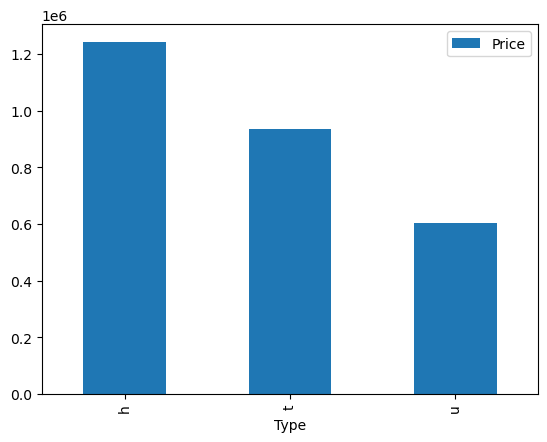

In [11]:
house_data[['Type', 'Price']].groupby('Type').mean().plot(kind = 'bar')

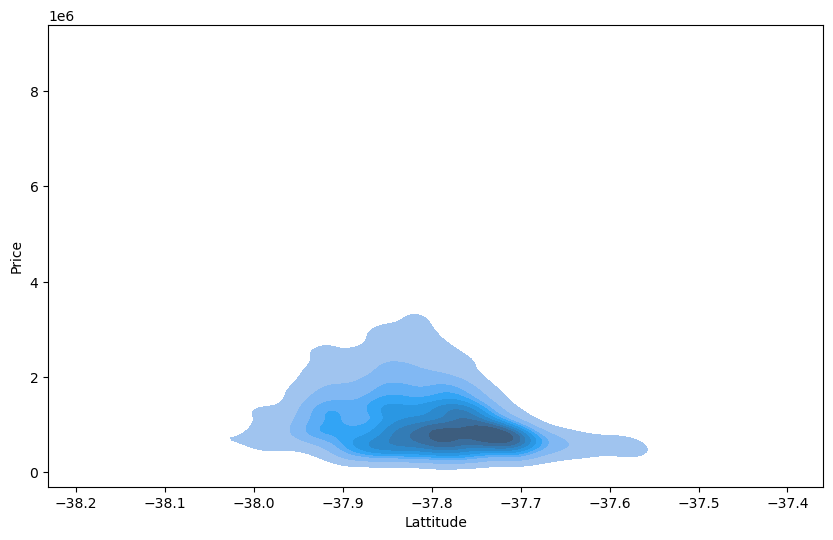

In [12]:
# 위도와 가격에 따른 밀도 확인
plt.figure(figsize = (10,6))
sns.kdeplot(x = 'Lattitude', y = 'Price', data = house_data, fill = True)
plt.show()
# 데이터의 분포를 확인할 때 용이한 그래프

In [13]:
# councilarea 값 확인
house_data['CouncilArea'].unique()

array(['Yarra', 'Moonee Valley', 'Port Phillip', 'Darebin', 'Hobsons Bay',
       'Stonnington', 'Boroondara', 'Monash', 'Glen Eira', 'Whitehorse',
       'Maribyrnong', 'Bayside', 'Moreland', 'Manningham', 'Banyule',
       'Melbourne', 'Kingston', 'Brimbank', 'Hume', nan, 'Knox',
       'Maroondah', 'Casey', 'Melton', 'Greater Dandenong', 'Nillumbik',
       'Whittlesea', 'Frankston', 'Macedon Ranges', 'Yarra Ranges',
       'Wyndham', 'Cardinia', 'Unavailable', 'Moorabool'], dtype=object)

In [14]:
len(house_data['CouncilArea'].unique())

34

<Axes: xlabel='count', ylabel='CouncilArea'>

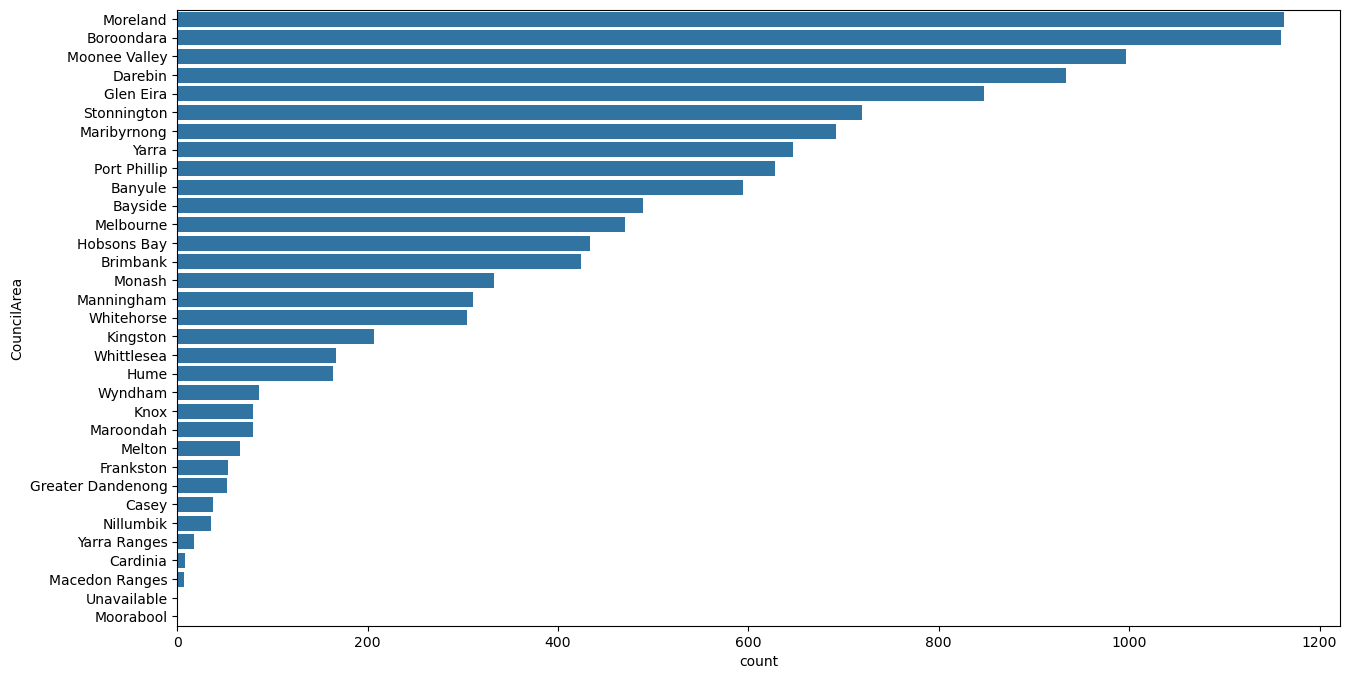

In [15]:
# 관할 구역별 주택의 수 분포 확인
plt.figure(figsize = (15,8))
sns.countplot(y = 'CouncilArea', data = house_data,
              order = house_data['CouncilArea'].value_counts().index)

In [16]:
# 결측치를 특정한 값으로 채워주는 함수 -> fillna()
house_data['CouncilArea'].fillna('Moreland')
# 최빈값으로 결측치를 채워주는  1번째 방법
# inplace 옵션을 반영하지 않았기에 데이터에 결측치는 그대로인 상태이다.

0           Yarra
1           Yarra
2           Yarra
3           Yarra
4           Yarra
           ...   
13575    Moreland
13576    Moreland
13577    Moreland
13578    Moreland
13579    Moreland
Name: CouncilArea, Length: 13580, dtype: object

In [17]:
# 지역 이름을 이용해서 관할 구역 결측치를 채워주자
# 지역에 매칭되어있는 관할 구역의 수 확인

In [18]:
# 전체 행을 보는 방법(생략된 행을 보여주세요)
pd.set_option('display.max_rows',None)

In [19]:
house_data.pivot_table(
    values = 'Rooms',
    index = ['Suburb', 'CouncilArea'],
    aggfunc = 'count'
)
# 확인용 데이터
# 매칭 되어 있는 관할 구역의 수를 확인해보자. -> 여러개의 관할구역에 매칭이 되어있는 곳도 있다.
# 최빈값으로 채워주자

Rooms
Suburb             CouncilArea             
Abbotsford         Yarra                 55
Aberfeldie         Moonee Valley         40
Airport West       Moonee Valley         61
Albanvale          Brimbank               4
Albert Park        Port Phillip          64
Albion             Brimbank              38
Alphington         Darebin               25
                   Yarra                  7
Altona             Hobsons Bay           69
Altona Meadows     Hobsons Bay            4
Altona North       Hobsons Bay           49
Ardeer             Brimbank               2
Armadale           Stonnington           86
Ascot Vale         Moonee Valley        125
Ashburton          Boroondara            53
Ashwood            Monash                45
Aspendale          Kingston               4
Aspendale Gardens  Kingston               2
Avondale Heights   Moonee Valley         73
Bacchus Marsh      Moorabool              1
Balaclava          Port Phillip          25
Balwyn             Boroondara           101
Balwyn North       Boroondara           151
Bayswater          Knox                  12
Bayswater North    Maroondah              5
Beaconsfield       Cardinia               2
Beaconsfield Upper Cardinia               1
Beaumaris          Bayside               11
Bellfield          Banyule               15
Bentleigh          Glen Eira            131
Bentleigh East     Glen Eira            234
Berwick            Casey                 11
Black Rock         Bayside                8
Blackburn          Whitehorse            13
Blackburn North    Whitehorse             7
Blackburn South    Whitehorse             8
Bonbeach           Kingston               1
Boronia            Knox                  12
Box Hill           Whitehorse            54
Braybrook          Maribyrnong           44
Briar Hill         Banyule                5
Brighton           Bayside              176
Brighton East      Bayside              124
                   Glen Eira              4
Broadmeadows       Hume                  17
Brookfield         Melton                 1
Brooklyn           Brimbank               1
                   Hobsons Bay            7
Brunswick          Moreland             208
Brunswick East     Moreland              80
Brunswick West     Moreland             102
Bulleen            Manningham            65
Bullengarook       Macedon Ranges         1
Bundoora           Banyule               13
                   Darebin                2
                   Whittlesea            10
Burnley            Yarra                  7
Burnside Heights   Melton                 2
Burwood            Monash                14
                   Whitehorse            61
Burwood East       Whitehorse            12
Cairnlea           Brimbank               7
Camberwell         Boroondara           124
Campbellfield      Hume                   3
Canterbury         Boroondara            51
Carlton            Melbourne             48
Carlton North      Yarra                 44
Carnegie           Glen Eira            138
Caroline Springs   Melton                 9
Carrum             Kingston               9
Carrum Downs       Frankston              7
Caulfield          Glen Eira             12
Caulfield East     Glen Eira              8
Caulfield North    Glen Eira             35
Caulfield South    Glen Eira             45
Chadstone          Monash                34
Chelsea            Kingston               4
Chelsea Heights    Kingston               2
Cheltenham         Bayside                4
                   Kingston              26
Chirnside Park     Yarra Ranges           2
Clarinda           Kingston               2
Clayton            Monash                11
Clayton South      Kingston               3
Clifton Hill       Yarra                 52
Coburg             Moreland             176
Coburg North       Darebin                1
                   Moreland              53
Collingwood        Yarra                 62
Coolaroo           Hume           

In [20]:
# 최빈값으로만 구성된 테이블을 생성해주자
mode_data = house_data.groupby('Suburb')['CouncilArea'].agg(pd.Series.mode) # mode는 최빈값 나타냄

In [21]:
mode_data

Suburb
Abbotsford                        Yarra
Aberfeldie                Moonee Valley
Airport West              Moonee Valley
Albanvale                      Brimbank
Albert Park                Port Phillip
Albion                         Brimbank
Alphington                      Darebin
Altona                      Hobsons Bay
Altona Meadows              Hobsons Bay
Altona North                Hobsons Bay
Ardeer                         Brimbank
Armadale                    Stonnington
Ascot Vale                Moonee Valley
Ashburton                    Boroondara
Ashwood                          Monash
Aspendale                      Kingston
Aspendale Gardens              Kingston
Attwood                              []
Avondale Heights          Moonee Valley
Bacchus Marsh                 Moorabool
Balaclava                  Port Phillip
Balwyn                       Boroondara
Balwyn North                 Boroondara
Bayswater                          Knox
Bayswater North               Mar

In [24]:
# 결측치를 채울때 단순 기술 통계량이 아니라 연관성이 높은 데이터를 채워줌으로써 모델의 성능을 높일 수 있다.
# 결측치를 채우는 함수 생성 -> CouncilArea가 있다면 그대로 사용, 없으면 Suburb에 매칭된 데이터를 채워주자
# 함수 생성
def fill_council(row) :
    if pd.isnull(row['CouncilArea']) :
        return mode_data[row['Suburb']]
    else :
        return row['CouncilArea']

In [25]:
# 결측치 채워주기
house_data['CouncilArea'] = house_data.apply(fill_council, axis = 1)

In [26]:
# 결측치 여부 확인
house_data['CouncilArea'].isnull().sum()

0

In [27]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    13580 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [28]:
# 모델링 작업을 위해서 컬럼(특성) 선택 -> 상관관계를 이용해서 정답과 연관도가 높은 데이터 컬럼을 선택하자
# 상관관계 확인
house_corr = house_data.corr(numeric_only = True)
house_corr['Price'].abs().sort_values(ascending =False)

Price            1.000000
Rooms            0.496634
Bedroom2         0.475951
Bathroom         0.467038
YearBuilt        0.323617
Car              0.238979
Lattitude        0.212934
Longtitude       0.203656
Distance         0.162522
Postcode         0.107867
BuildingArea     0.090981
Propertycount    0.042153
Landsize         0.037507
Name: Price, dtype: float64

In [29]:
# 학습에 사용할 입력 특성 선택
feature_names = ['Rooms', 'Bedroom2', 'Bathroom', 'Lattitude', 'Longtitude', 'Distance', 'Type', 'CouncilArea']

In [30]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    13580 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [61]:
# 학습을 위한 데이터 분리
# X 문제데이터 / y 정답 데이터
# 주의! 머신러닝 학습을 하려면 무넺 데이터는 항상 2차원 이어야한다.
# 훈련용 / 테스트용 데이터

# 전체 행 보기 초기화
pd.reset_option('display.max_rows')

# 문제 데이터 추출
X = house_data[feature_names]
# 정답 데이터 추출
y = house_data['Price']

In [33]:
# 데이터 확인
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rooms        13580 non-null  int64  
 1   Bedroom2     13580 non-null  float64
 2   Bathroom     13580 non-null  float64
 3   Lattitude    13580 non-null  float64
 4   Longtitude   13580 non-null  float64
 5   Distance     13580 non-null  float64
 6   Type         13580 non-null  object 
 7   CouncilArea  13580 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 848.9+ KB


In [ ]:
# 현재 데이터를 살펴본 결과 문자열 데이터가 포함이 되어있다.
# 연산을 통해서 예측하는 머신러닝 모델 같은 경우 문자열 데이터가 있으면 예측이 안된다.
# 문자열 -> 수치형
# 수치형으로 바꾸는 방법 2가지
# 1. 라벨 인코딩 -> 1, 2, 3..... (회귀에서는 라벨인코딩을 쓰지 않는다)
# 2. 원 핫 인코딩
# 0과 1로 데이터를 변경하는 방법

In [56]:
# 원 핫 인코딩을 진행하자
pd.get_dummies(X)

,Rooms,Bedroom2,Bathroom,Lattitude,Longtitude,Distance,Type_h,Type_t,Type_u,CouncilArea_Banyule,...,CouncilArea_Moreland,CouncilArea_Nillumbik,CouncilArea_Port Phillip,CouncilArea_Stonnington,CouncilArea_Unavailable,CouncilArea_Whitehorse,CouncilArea_Whittlesea,CouncilArea_Wyndham,CouncilArea_Yarra,CouncilArea_Yarra Ranges
0,2,2.0,1.0,-37.79960,144.99840,2.5,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,2,2.0,1.0,-37.80790,144.99340,2.5,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,3,3.0,2.0,-37.80930,144.99440,2.5,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,3,3.0,2.0,-37.79690,144.99690,2.5,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,4,3.0,1.0,-37.80720,144.99410,2.5,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4,4.0,2.0,-37.90562,145.16761,16.7,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13576,3,3.0,2.0,-37.85927,144.87904,6.8,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13577,3,3.0,2.0,-37.85274,144.88738,6.8,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13578,4,4.0,1.0,-37.85908,144.89299,6.8,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
# 원핫 인코딩시 오류가 난다 -> 에러 해석 결과 데이터 내부에 배열 형태의 데이터가 있음을 확인
X['CouncilArea'] = X['CouncilArea'].astype('str')

In [37]:
dd = X[X['CouncilArea'] == '[]']
dd

,Rooms,Bedroom2,Bathroom,Lattitude,Longtitude,Distance,Type,CouncilArea
12251,3,3.0,2.0,-37.75225,144.75520,14.8,h,[]
12438,3,3.0,2.0,-37.67379,144.89826,16.5,h,[]
12865,3,3.0,1.0,-37.40853,144.97749,44.2,h,[]
13245,5,5.0,3.0,-37.45392,144.58864,48.1,h,[]
13264,4,4.0,2.0,-37.71429,144.72492,23.8,h,[]
13381,3,3.0,2.0,-37.74518,144.74708,14.8,h,[]
13494,4,4.0,2.0,-37.87931,145.41288,34.1,h,[]


In [62]:
# []가 들어간 데이터는 삭제 시켜줍시다
X.drop(dd.index, inplace = True)

In [78]:
# []가 들어간 데이터는 삭제 시켜줍시다
y.drop(dd.index, inplace = True)

In [79]:
X_one_hot = pd.get_dummies(X, dtype = 'int64')

In [80]:
pd.get_dummies(X, dtype = 'int64')

,Rooms,Bedroom2,Bathroom,Lattitude,Longtitude,Distance,Type_h,Type_t,Type_u,CouncilArea_Banyule,...,CouncilArea_Moreland,CouncilArea_Nillumbik,CouncilArea_Port Phillip,CouncilArea_Stonnington,CouncilArea_Unavailable,CouncilArea_Whitehorse,CouncilArea_Whittlesea,CouncilArea_Wyndham,CouncilArea_Yarra,CouncilArea_Yarra Ranges
0,2,2.0,1.0,-37.79960,144.99840,2.5,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,2.0,1.0,-37.80790,144.99340,2.5,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,3.0,2.0,-37.80930,144.99440,2.5,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,3.0,2.0,-37.79690,144.99690,2.5,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4,3.0,1.0,-37.80720,144.99410,2.5,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4,4.0,2.0,-37.90562,145.16761,16.7,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13576,3,3.0,2.0,-37.85927,144.87904,6.8,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13577,3,3.0,2.0,-37.85274,144.88738,6.8,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13578,4,4.0,1.0,-37.85908,144.89299,6.8,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
# 데이터 분할하기
# 라이브러리 불러오기 
from sklearn.model_selection import train_test_split

In [82]:
X.shape, y.shape

((13573, 8), (13573,))

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_one_hot, y,
                                                    test_size = 0.3,
                                                    random_state = 428 
                                                   )

In [85]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9501, 42), (4072, 42), (9501,), (4072,))

In [86]:
# 모델 생성 
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

In [87]:
# 모델 학습
linear.fit(X_train, y_train)

LinearRegression()

In [88]:
# 모델 평가
# 정답의 예측값이 필요하다.
pred = linear.predict(X_test)
pred

array([2119185.59943708,  835251.18795542,  441253.68113348, ...,
        221460.20927243,  482209.5343102 , 1187840.49508101])

In [89]:
# 평가지표 적용
# sklearn.metrics : 평가지표 모음집
from sklearn.metrics import mean_squared_error as mse

In [90]:
# mse(평균 제곱 오차) 살펴보기
mse(y_test, pred)

175439251580.29077

In [91]:
# rmse(평균 제곱근 오차) 살펴보기
# rmse는 평가지표에 구현이 되어있지 않다.
# numpy의 sqrt 함수를 이용해서 루트를 씌워주자
np.sqrt(mse(y_test, pred))

418854.69029281597